# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

In [2]:
import pandas as pd
import numpy as np

# Allow for multiple outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

,Expenditures
Ethnicity,
American Indian,36438.250000
Asian,18392.372093
Black,20884.593220
Hispanic,11065.569149
Multi Race,4456.730769
Native Hawaiian,42782.333333
Other,3316.500000
White not Hispanic,24697.548628


<AxesSubplot:xlabel='Ethnicity'>

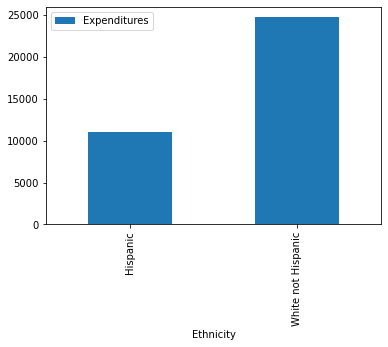

In [17]:
df = pd.read_csv('ca_dds_expenditures.csv')

df_temp = df.pivot_table(index=['Ethnicity'], values=['Expenditures'], aggfunc=np.mean)
df_temp 
df_temp.loc[['Hispanic','White not Hispanic']].fillna(1).plot.bar()

**YOUR EXPLANATION HERE**

I see that the average expenditures of White (non-Hispanic) residents is more than double that of Hispanic residents.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

<AxesSubplot:xlabel='Ethnicity,Age Cohort'>

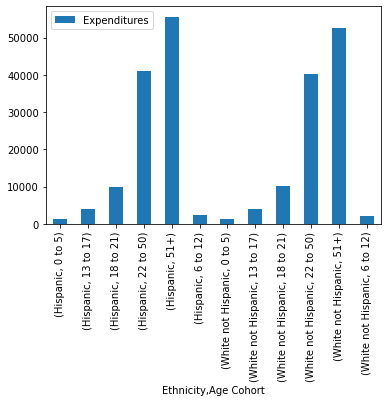

In [21]:
df_temp = df.pivot_table(index=['Ethnicity', 'Age Cohort'], values=['Expenditures'], aggfunc=np.mean)
# df_temp 
df_temp.loc[['Hispanic','White not Hispanic']].fillna(1).plot.bar()

**YOUR EXPLANATION HERE**

I see that the average expenditures in each age cohort of Hispanic residents is about the same if not more than their White (non-hispanic) counterparts. This contradicts the results obtained in Question 1 where we observed that the overall average expenditures of White (non-hispanic) residents was more than double that of Hispanic residents.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic
...,...,...,...,...,...,...
995,99622,51+,86,Female,57055,White not Hispanic
996,99715,18 to 21,20,Male,7494,Hispanic
997,99718,13 to 17,17,Female,3673,Multi Race
998,99791,6 to 12,10,Male,3638,Hispanic


LinAlgError: singular matrix

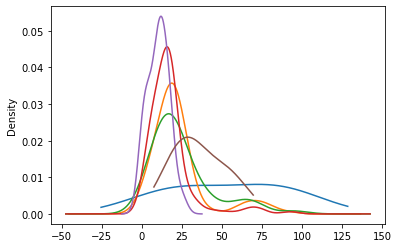

In [45]:
df
df.groupby(df['Ethnicity']).Age.plot(kind='kde')

# df_temp = df.pivot_table(index=['Ethnicity'], columns=['Age'], aggfunc='count')
# df_temp 
# df_temp.loc[['Hispanic','White not Hispanic']]
# df_temp.loc[['Hispanic','White not Hispanic']].fillna(1).plot.bar()

**YOUR EXPLANATION HERE (although you may want to add more markdown cells)**